In [1]:
import pandas as pd
train = pd.read_csv('~/Desktop/DevMaster/Hack_day/train.csv', parse_dates=True)
test = pd.read_csv('~/Desktop/DevMaster/Hack_day/test.csv', parse_dates=True)

# it is recommended that you do this as to let the date column appropriate itself nicer
#train.info()
#train.head()



#
#
#
#
#
#

import numpy as np
import pandas as pd
import matplotlib as plt
%matplotlib inline

import seaborn as sns
sns.set_style('whitegrid')
import warnings
warnings.filterwarnings('ignore')


from scipy import stats
from sklearn import linear_model
from sklearn import neighbors
from sklearn.metrics import mean_squared_error,accuracy_score
from sklearn import preprocessing

from math import log

In [2]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [3]:
train.notnull().sum()

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
dtype: int64

In [4]:
test.notnull().sum()

PassengerId    418
Pclass         418
Name           418
Sex            418
Age            332
SibSp          418
Parch          418
Ticket         418
Fare           417
Cabin           91
Embarked       418
dtype: int64

In [5]:
# Set an empty list so we can determine which variables are numerical & categorical.
numericals = []
categoricals = []
# Set an empty list so we can determine which columns to delete.
deleteColumns = []
deleteRows = []
# Set an empty list so we can jot down our notes later for the other data preparation section.
reassess = []
transforms = []
mined = []
engineered = []

In [6]:
# Here is a list of the columns.
columns = train.columns
columns

Index([u'PassengerId', u'Survived', u'Pclass', u'Name', u'Sex', u'Age',
       u'SibSp', u'Parch', u'Ticket', u'Fare', u'Cabin', u'Embarked'],
      dtype='object')

In [7]:
############################
############################
############################

In [8]:
### APPEND test to train
train.tail(1)
#train.nunique()




,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [9]:
test.tail(1)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
417,1309,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


In [10]:
full_train=train.append(test,ignore_index=True)

In [11]:
############################
############################
############################
############################

In [12]:
def age(a):
    
    if a <= 10.0:
        return 'A'
    elif a <= 20.0:
        return 'B'
    elif a <= 40.0:
        return 'C'
    elif a <= 55.0:
        return 'D'
    elif a <= 100:
        return 'E'
    

In [13]:
full_train.Age.value_counts()

24.00    47
22.00    43
21.00    41
30.00    40
18.00    39
25.00    34
28.00    32
36.00    31
26.00    30
29.00    30
27.00    30
19.00    29
23.00    26
32.00    24
20.00    23
35.00    23
31.00    23
45.00    21
33.00    21
17.00    20
39.00    20
16.00    19
42.00    18
40.00    18
34.00    16
50.00    15
47.00    14
48.00    14
38.00    14
2.00     12
         ..
28.50     3
12.00     3
0.83      3
34.50     2
71.00     2
45.50     2
70.00     2
14.50     2
30.50     2
0.92      2
36.50     2
23.50     1
67.00     1
60.50     1
38.50     1
0.17      1
55.50     1
0.33      1
20.50     1
24.50     1
66.00     1
0.42      1
70.50     1
11.50     1
26.50     1
76.00     1
22.50     1
74.00     1
80.00     1
0.67      1
Name: Age, Length: 98, dtype: int64

In [14]:
#train[train['Age'].isnull()]
#train[train['Embarked'].isnull()]
#train[train['Cabin'].isnull()]
#import seaborn as sns; sns.set(style="ticks", color_codes=True)

In [15]:
#g=sns.pairplot(train)
#d={'NaN':0}

fare_median = full_train.groupby(['Sex', 'Pclass']).Fare.median()
fare_median.name = 'FareMedian'

age_mean = full_train.groupby(['Sex', 'Pclass']).Age.mean()
age_mean.name = 'AgeMean'

def join(df, stat):
    return pd.merge(df, stat.to_frame(), left_on=['Sex', 'Pclass'], right_index=True, how='left')

full_train['Fare'] = full_train.Fare.fillna(join(full_train, fare_median).FareMedian)
full_train['Age'] = full_train.Age.fillna(join(full_train, age_mean).AgeMean)

#a=full_train['Age'].mean()
#b=train['Cabin'].mean()
#full_train.Age.fillna(a,inplace=True)
#train['Embarked'].value_counts()
full_train.Embarked.fillna('S',inplace=True)

#train['Embarked'].mean()
#train['Cabin'].mean()
#train['Age'].fillna(4)

In [16]:
print full_train['Age'].head(3)
full_train.Age=full_train.Age.apply(lambda x: age(x))

0    22.0
1    38.0
2    26.0
Name: Age, dtype: float64


In [17]:
full_train['Age'].head(30)

0     C
1     C
2     C
3     C
4     C
5     C
6     D
7     A
8     C
9     B
10    A
11    E
12    B
13    C
14    B
15    D
16    A
17    C
18    C
19    C
20    C
21    C
22    B
23    C
24    A
25    C
26    C
27    B
28    C
29    C
Name: Age, dtype: object

In [18]:
#sns.pairplot(train) 
#,x_vars=['Age','Embarked'],y_vars=['Age','Embarked']

In [19]:
#full_train['Fare'].fillna(train['Fare'].median(), inplace = True)

# FEATURE ENGINEERING

In [20]:

######################################


import string

def subst_strings(single,whole_list):
    
    for single_str in whole_list:
          if string.find(single,single_str)  !=-1:
            return single_str
    return np.nan
    
    
    
title_list=['Mrs', 'Mr', 'Master', 'Miss', 'Major', 'Rev',
                    'Dr', 'Ms', 'Mlle','Col', 'Capt', 'Mme', 'Countess',
                    'Don', 'Jonkheer']

full_train['Title']=full_train['Name'].map(lambda x: subst_strings(x,title_list))


def replace_titles(x):
    title=x['Title']
    if title in ['Don', 'Major', 'Capt', 'Jonkheer', 'Rev', 'Col']:
        return 'Mr'
    elif title in ['Countess', 'Mme']:
        return 'Mrs'
    elif title in ['Mlle', 'Ms']:
        return 'Miss'
    elif title =='Dr':
        if x['Sex']=='Male':
            return 'Mr'
        else:
            return 'Mrs'
    else:
        return title

    
   
full_train['Age*Class']=full_train['Age']*full_train['Pclass']
full_train['Title']=full_train.apply(replace_titles,axis=1)

###########################################



full_train['FamilySize']=full_train['SibSp']+full_train['Parch']
cabin_list = ['A', 'B', 'C', 'D', 'E', 'F', 'T', 'G', 'NaN']
full_train['Deck']=full_train['Cabin'].map(lambda x: subst_strings(str(x), cabin_list))

In [21]:
full_train.Deck.fillna('C',inplace=True)

In [22]:
#full_train.Deck.value_counts()

In [53]:
afterDelete.head(2)

,Age,Embarked,Fare,Parch,Pclass,Sex,SibSp,Survived,Title,FamilySize,Deck
0,C,S,7.2500,0,3,male,1,0.0,Mr,1,C
1,C,C,71.2833,0,1,female,1,1.0,Mrs,1,C


In [23]:
full_train['Deck']

0       C
1       C
2       C
3       C
4       C
5       C
6       E
7       C
8       C
9       C
10      G
11      C
12      C
13      C
14      C
15      C
16      C
17      C
18      C
19      C
20      C
21      D
22      C
23      A
24      C
25      C
26      C
27      C
28      C
29      C
       ..
1279    C
1280    C
1281    B
1282    D
1283    C
1284    C
1285    C
1286    C
1287    C
1288    B
1289    C
1290    C
1291    C
1292    C
1293    C
1294    C
1295    D
1296    D
1297    C
1298    C
1299    C
1300    C
1301    C
1302    C
1303    C
1304    C
1305    C
1306    C
1307    C
1308    C
Name: Deck, Length: 1309, dtype: object

In [24]:
full_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 15 columns):
Age            1309 non-null object
Cabin          295 non-null object
Embarked       1309 non-null object
Fare           1309 non-null float64
Name           1309 non-null object
Parch          1309 non-null int64
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Sex            1309 non-null object
SibSp          1309 non-null int64
Survived       891 non-null float64
Ticket         1309 non-null object
Title          1309 non-null object
FamilySize     1309 non-null int64
Deck           1309 non-null object
dtypes: float64(2), int64(5), object(8)
memory usage: 153.5+ KB


In [25]:
deleteColumns.append('PassengerId')
deleteColumns.append('Cabin')
#deleteColumns.append('Age')
afterDelete=full_train.copy()

for columns in range(len(deleteColumns)):
    del afterDelete[deleteColumns[columns]]



#del Xy['PassengerId']
del afterDelete['Ticket']
del afterDelete['Name']

In [26]:
afterDelete['Pclass']=afterDelete['Pclass'].astype('str')

In [27]:
afterDelete.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 11 columns):
Age           1309 non-null object
Embarked      1309 non-null object
Fare          1309 non-null float64
Parch         1309 non-null int64
Pclass        1309 non-null object
Sex           1309 non-null object
SibSp         1309 non-null int64
Survived      891 non-null float64
Title         1309 non-null object
FamilySize    1309 non-null int64
Deck          1309 non-null object
dtypes: float64(2), int64(3), object(6)
memory usage: 112.6+ KB


In [28]:
#afterDelete['Deck']

In [29]:
afterDelete.head(2)
afterDelete.nunique()
afterDelete.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 11 columns):
Age           1309 non-null object
Embarked      1309 non-null object
Fare          1309 non-null float64
Parch         1309 non-null int64
Pclass        1309 non-null object
Sex           1309 non-null object
SibSp         1309 non-null int64
Survived      891 non-null float64
Title         1309 non-null object
FamilySize    1309 non-null int64
Deck          1309 non-null object
dtypes: float64(2), int64(3), object(6)
memory usage: 112.6+ KB


#### dummies

Sex
PClass
Ticket

In [30]:
Xy = pd.get_dummies(afterDelete, drop_first = True)
#Xy.head(10)
Xy.columns
Xy.head(2)
#Xy.info()

,Fare,Parch,SibSp,Survived,FamilySize,Age_B,Age_C,Age_D,Age_E,Embarked_Q,...,Title_Miss,Title_Mr,Title_Mrs,Deck_B,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_T
0,7.2500,0,1,0.0,1,0,1,0,0,0,...,0,1,0,0,1,0,0,0,0,0
1,71.2833,0,1,1.0,1,0,1,0,0,0,...,0,0,1,0,1,0,0,0,0,0


In [31]:
Xy.head(2)

,Fare,Parch,SibSp,Survived,FamilySize,Age_B,Age_C,Age_D,Age_E,Embarked_Q,...,Title_Miss,Title_Mr,Title_Mrs,Deck_B,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_T
0,7.2500,0,1,0.0,1,0,1,0,0,0,...,0,1,0,0,1,0,0,0,0,0
1,71.2833,0,1,1.0,1,0,1,0,0,0,...,0,0,1,0,1,0,0,0,0,0


# Final Step.............

In [32]:
len(Xy),len(train),len(test)

(1309, 891, 418)

In [33]:
print('split at',len(train))

('split at', 891)


In [34]:
editedTrain=Xy[:891]
editedTest=Xy[891:]


In [35]:
len(editedTrain), len(editedTest)

(891, 418)

In [36]:
y=editedTrain['Survived']
X=editedTrain.copy()
del X['Survived']

In [37]:
from sklearn.cross_validation import train_test_split as tts
X_train, X_test, y_train, y_test = tts(X, y, test_size = .2, random_state = 44)

/usr/local/lib/python2.7/dist-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [38]:
################################
from sklearn.linear_model import LogisticRegression,LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier


log = LogisticRegression()
tree = DecisionTreeClassifier()
forest = RandomForestClassifier()
gradient = GradientBoostingClassifier()
ada = AdaBoostClassifier()




#################################

In [39]:
#models = []
#models.append(('l', LogisticRegression()))
#models.append(('t', DecisionTreeClassifier()))
#models.append(('f', RandomForestClassifier()))
#models.append(('g', GradientBoostingClassifier()))
#models.append(('a', AdaBoostClassifier()))




l = log.fit(X_train, y_train)
t = tree.fit(X_train, y_train)
f = forest.fit(X_train, y_train)
g = gradient.fit(X_train, y_train)
a = ada.fit(X_train, y_train)

In [40]:
###y_test

print("The score for Logistic Regression is, ", l.score(X_test, y_test))
print("The score for Decision Trees is ", t.score(X_test,y_test))
print("The score for Random Forest is ", f.score(X_test,y_test))
print("The score for Gradient Descent is ", g.score(X_test, y_test))
print("The score for AdaBoost is ", a.score(X_test, y_test))

('The score for Logistic Regression is, ', 0.77653631284916202)
('The score for Decision Trees is ', 0.72625698324022347)
('The score for Random Forest is ', 0.72067039106145248)
('The score for Gradient Descent is ', 0.74860335195530725)
('The score for AdaBoost is ', 0.75418994413407825)


# Submission

In [41]:
del editedTest['Survived']
editedTest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 891 to 1308
Data columns (total 23 columns):
Fare          418 non-null float64
Parch         418 non-null int64
SibSp         418 non-null int64
FamilySize    418 non-null int64
Age_B         418 non-null uint8
Age_C         418 non-null uint8
Age_D         418 non-null uint8
Age_E         418 non-null uint8
Embarked_Q    418 non-null uint8
Embarked_S    418 non-null uint8
Pclass_2      418 non-null uint8
Pclass_3      418 non-null uint8
Sex_male      418 non-null uint8
Title_Miss    418 non-null uint8
Title_Mr      418 non-null uint8
Title_Mrs     418 non-null uint8
Deck_B        418 non-null uint8
Deck_C        418 non-null uint8
Deck_D        418 non-null uint8
Deck_E        418 non-null uint8
Deck_F        418 non-null uint8
Deck_G        418 non-null uint8
Deck_T        418 non-null uint8
dtypes: float64(1), int64(3), uint8(19)
memory usage: 20.9 KB


In [42]:
def run_this_model(mod,test):
    ret=mod.predict(test)
    return ret

In [43]:
res=pd.DataFrame(columns=['PassengerId','Survived'])
res.head(2)
res['PassengerId']=test['PassengerId']

# Learning curves (adapted from kaggle tutorial,not needed at the moment):

In [44]:
from sklearn.model_selection import cross_val_score, learning_curve, validation_curve

num_folds = 7
def plot_curve(ticks, train_scores, test_scores):
    
    import matplotlib.pyplot as plt
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.figure()
    plt.fill_between(ticks, 
                     
                    train_scores_mean - train_scores_std, 
                    train_scores_mean + train_scores_std, alpha=0.1, color="b")
    plt.fill_between(ticks, 
                     test_scores_mean - test_scores_std, 
                     test_scores_mean + test_scores_std, alpha=0.1, color="r")
    plt.plot(ticks, train_scores_mean, 'b-', label='Training score')
    plt.plot(ticks, test_scores_mean, 'r-', label='CV score')
    plt.legend()
    return plt.gca()


def plot_learning_curve(clf, X, y, scoring='accuracy'):
    
    ax = plot_curve(*learning_curve(clf, X, y, cv=num_folds, scoring=scoring, 
                                    train_sizes=np.linspace(0.1,1,10), n_jobs=-1))
    ax.set_title('Learning curve: {}'.format(clf.__class__.__name__))
    ax.set_xlabel('Training size')
    ax.set_ylabel(scoring)
    
    
#names=['l','g']

#for i in range(len(names)):
    
#    plot_learning_curve(i,X_train,y_train)

In [45]:
import numpy as np

In [46]:
#res['Survived']=np.random.randint(2, size=418)
res['Survived']=np.random.uniform(0,1)
#res['Survived']=np.zeros(418)
#res['Survived']=res.Survived.astype(int)

In [47]:
res['Survived']

0      0.612115
1      0.612115
2      0.612115
3      0.612115
4      0.612115
5      0.612115
6      0.612115
7      0.612115
8      0.612115
9      0.612115
10     0.612115
11     0.612115
12     0.612115
13     0.612115
14     0.612115
15     0.612115
16     0.612115
17     0.612115
18     0.612115
19     0.612115
20     0.612115
21     0.612115
22     0.612115
23     0.612115
24     0.612115
25     0.612115
26     0.612115
27     0.612115
28     0.612115
29     0.612115
         ...   
388    0.612115
389    0.612115
390    0.612115
391    0.612115
392    0.612115
393    0.612115
394    0.612115
395    0.612115
396    0.612115
397    0.612115
398    0.612115
399    0.612115
400    0.612115
401    0.612115
402    0.612115
403    0.612115
404    0.612115
405    0.612115
406    0.612115
407    0.612115
408    0.612115
409    0.612115
410    0.612115
411    0.612115
412    0.612115
413    0.612115
414    0.612115
415    0.612115
416    0.612115
417    0.612115
Name: Survived, Length: 

In [48]:
res

,PassengerId,Survived
0,892,0.612115
1,893,0.612115
2,894,0.612115
3,895,0.612115
4,896,0.612115
5,897,0.612115
6,898,0.612115
7,899,0.612115
8,900,0.612115
9,901,0.612115


In [49]:
res.to_csv('Random.csv', index=False)


In [50]:
res

,PassengerId,Survived
0,892,0.612115
1,893,0.612115
2,894,0.612115
3,895,0.612115
4,896,0.612115
5,897,0.612115
6,898,0.612115
7,899,0.612115
8,900,0.612115
9,901,0.612115


# This is  repeat of the prediction above (ala .score()):


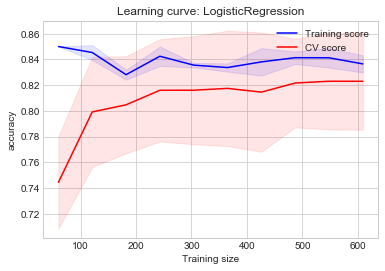

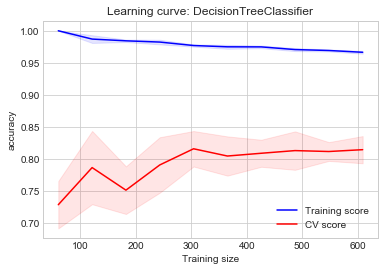

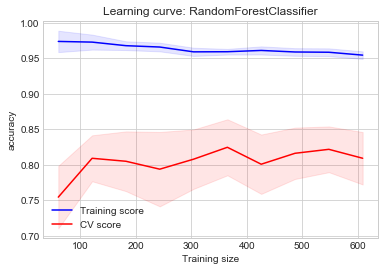

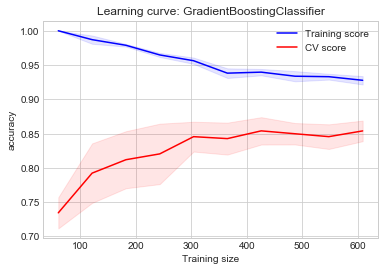

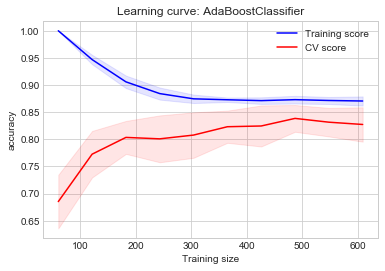

In [51]:
#for name,model in models:
#    model.predict(editedTest)

mod=[l,t,f,g,a]
#survived=[]

for i in mod:
    survived=run_this_model(i,X_test) #X_test
    type(survived)
  #  print i.__class__.__name__
  #  print  len(y_test)
    sc=accuracy_score(survived,y_test) 
    survived=run_this_model(i,editedTest)
    res['Survived']=survived.astype(int)
    file_name='results_'+i.__class__.__name__+'_acc'+sc.astype(str)+'.csv'
    res.to_csv(file_name, index=False)
    plot_learning_curve(i,X_train,y_train)
    
#survived=l.predict(editedTest)
#survived=t.predict(editedTest)
#survived=f.predict(editedTest)
#survived=g.predict(editedTest)
#survived=a.predict(editedTest)